## Chapter 1

## Chapter 2

## Chapter 3

## Chapter 4
假設目前有一個每層都只有一個神經元的最簡單神經網路。  
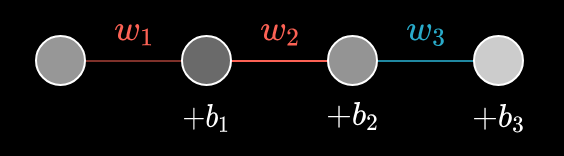  
This network is determined by 3 weights(權重) (one for each connection) and 3 biases(偏置) (one for each neuron, except the first)  
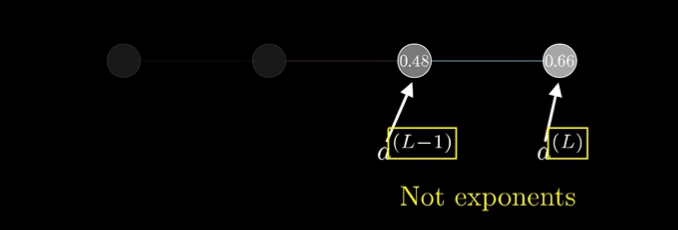  
使用$a^{(L)}$來表示最終層神經元的激活值，而前一層則就是$a^{(L-1)}$

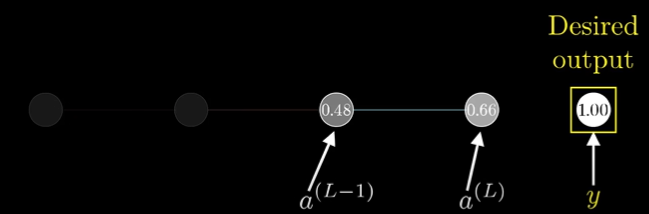  
將最終層希望接近的目標稱作$y$，這邊的$y$可能是$0$或是$1$，而這個網路的cost計算方式就等於，$C_0(...)=(a^{(L)}-y)^2$  


最終層的加權值：$z^{(L)} = w^{(L)}a^{(L-1)}+b^{(L)}$  
接著將這個加權後的值$z^{(L)}$放入特定的非線性函數中(ex. sigmoid、ReLu)，成為最終層的激活函數，$a^{(L)} = σ(w^{(L)}a^{(L-1)}+b^{(L)})$

因此，得到以下關係:  
先使用$w^{(L)}$、$a^{(L-1)}$、$b^{(L)}$計算出$z^{(L)}$，再利用$z^{(L)}$與常量$y$算出cost$C_{0}$，而$a^{(L-1)}$同時也是由他自己的權重與偏置決定的，以此類推。  
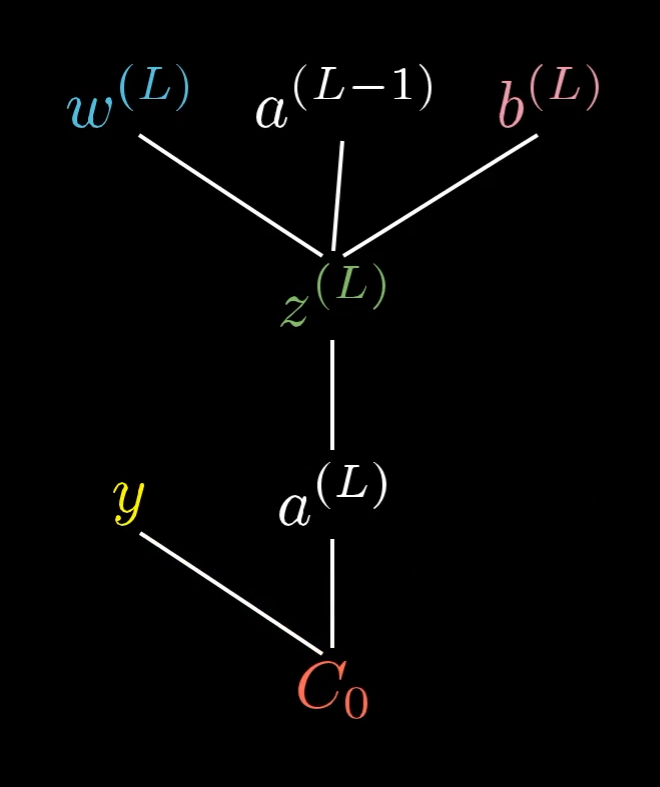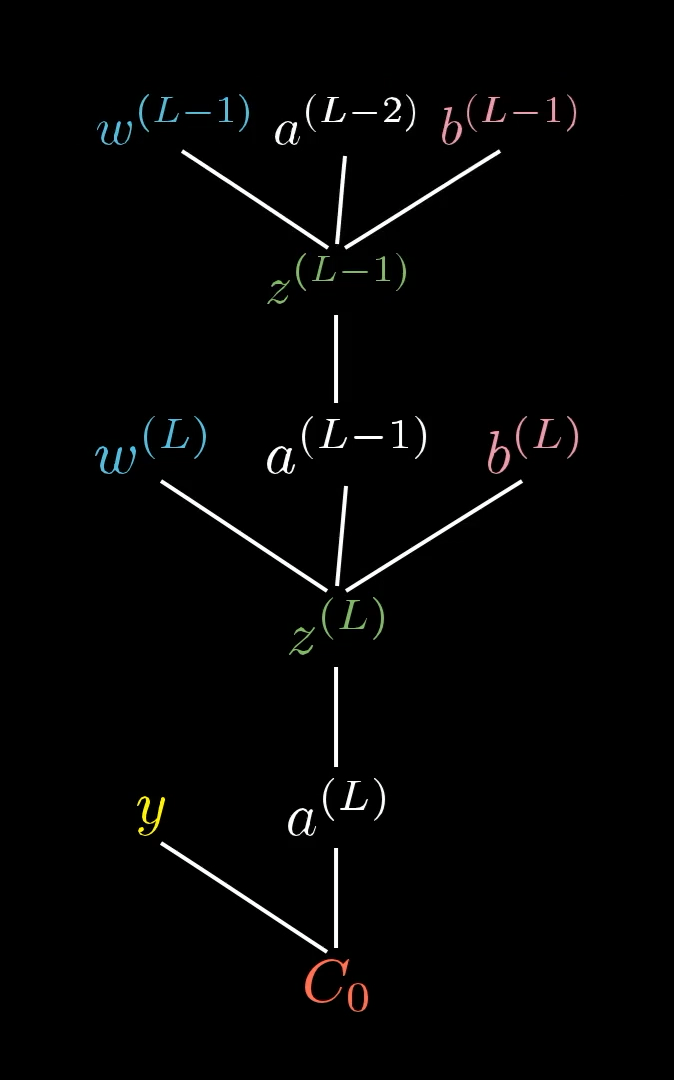  


假設每個數字都對應一個數軸。  
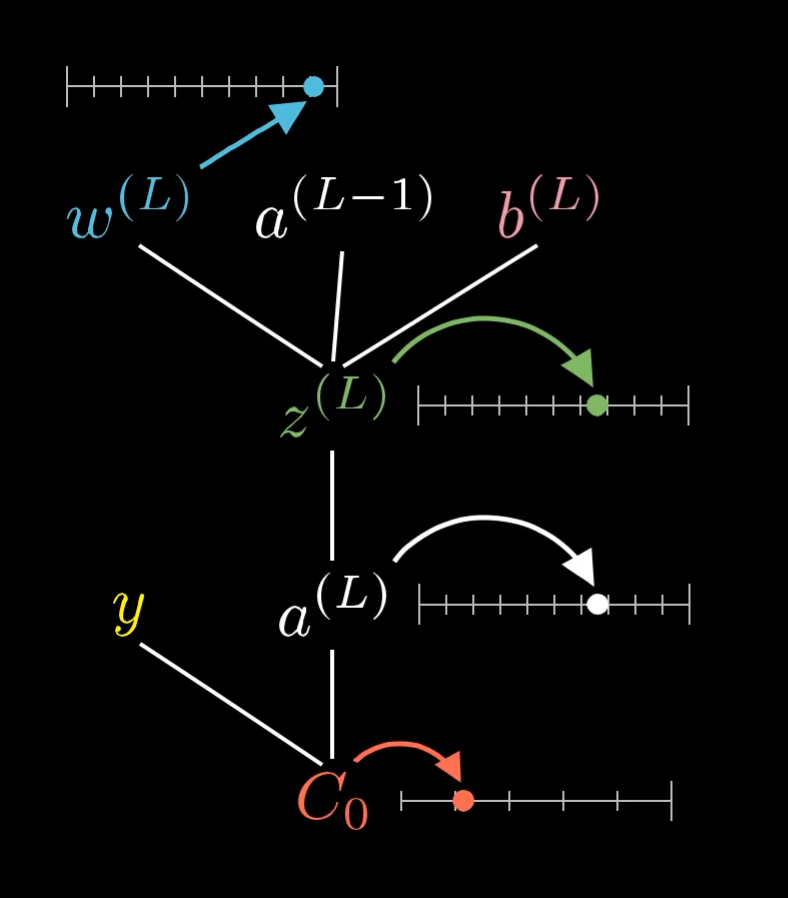  


**$C_{0}$對$w^{(L)}$的變化的敏感程度**，意即求$C_{0}$對$w^{(L)}$的導數→$\frac{∂C_0}{∂w^{(L)}}$  
當看到$∂w^{(L)}$時，將他視為對$w^{(L)}$的微小擾動  
當看到$∂C_{0}$時，將他視為改變$w$後對$C_{0}$造成的變化  


$z^{(L)} = w^{(L)}a^{(L-1)}+b^{(L)}$  
$a^{(L)} = σ(z^{(L)})$  
$C_0(...)=(a^{(L)}-y)^2$  
而由上方的公式可知，同時$w^{(L)}$產生的微小變化將導致$z^{(L)}$產生變化，接著使$a^{(L)}$產生變化，最終影響到$∂C_{0}$(代價值)

首先，先求$z^{(L)}$的變化量比上$w^{(L)}$的變化量，意即求$z^{(L)}$對$w^{(L)}$的導數→$\frac{∂z^{(L)}}{∂w^{(L)}}$  
同理，考慮$a^{(L)}$的變化量比上$z^{(L)}$的變化量→$\frac{∂a^{(L)}}{∂z^{(L)}}$  
以及最終$C_{0}$的變化量比上直接改動$a^{(L)}$的變化量→$\frac{∂C_0}{∂a^{(L)}}$  
將三個比相乘，依照微積分的**Chain rule**可知$C_0$對$w^{(L)}$變化的敏感程度。  
### $\frac{∂C_0}{∂w^{(L)}} = \frac{∂z^{(L)}}{∂w^{(L)}}\frac{∂a^{(L)}}{∂z^{(L)}}\frac{∂C_0}{∂a^{(L)}}$  
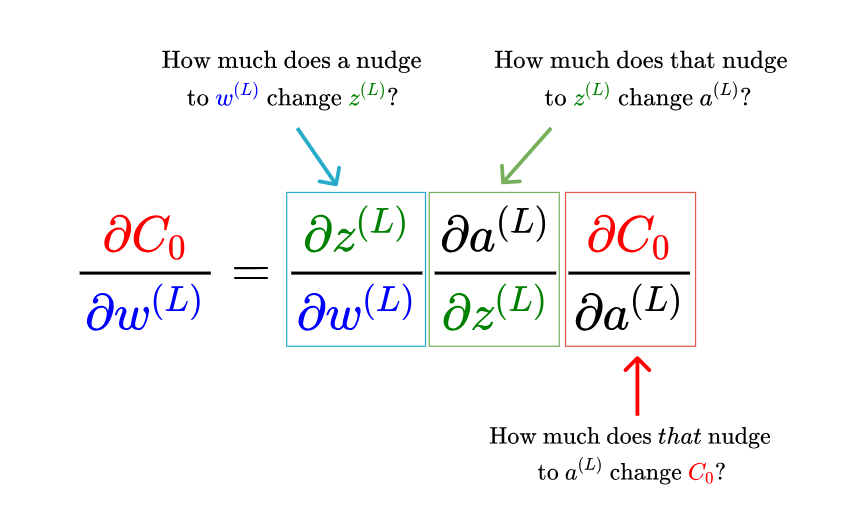

由 $C_0=(a^{(L)}-y)^2$，$C_0$對$a^{(L)}$的導數即是：
#### $\frac{∂C_0}{∂a^{(L)}}=2(a^{(L)}-y)$  
這表示導數的大小跟神經網路最終的輸出($a^{(L)}$)-目標($y$)的差成正比。  
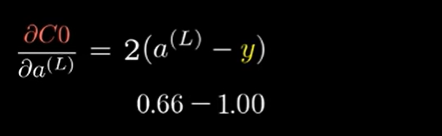  
這表示，在$a^{(L)}$跟$y$的差距非常大時，即使$w$只改變一點，$C_0$的改變也會非常大。  
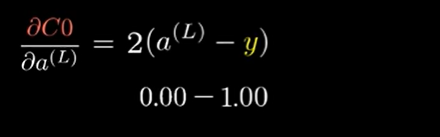

由$a^{(L)} = σ(z^{(L)})$，$a^{(L)}$對$z^{(L)}$求導數就是求sigmoid的導數，或任何自己選擇的非線性激活函數：  
#### $\frac{∂a^{(L)}}{∂z^{(L)}}=σ'(z^{(L)})$  

由$z^{(L)} = w^{(L)}a^{(L-1)}+b^{(L)}$，$z^{(L)}$對$w^{(L)}$求導數：  
#### $\frac{∂z^{(L)}}{∂w^{(L)}}=a^{(L-1)}$  

此處涉及到反向傳播的概念，即$w$權重對最後一層的影響取決於$a^{(L-1)}$(前一層的神經元)。  

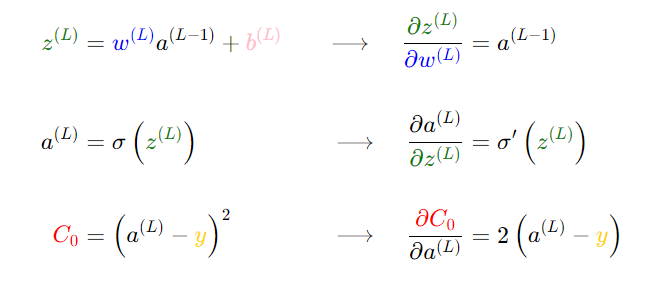

綜合上方分解得到的導數，得到以下公式：  
### $\frac{∂C_0}{∂w^{(L)}} = \frac{∂z^{(L)}}{∂w^{(L)}}\frac{∂a^{(L)}}{∂z^{(L)}}\frac{∂C_0}{∂a^{(L)}} = a^{(L-1)}σ'(z^{(L)})2(a^{(L)}-y)$  
這個公式告訴我們最後一層中某個特定權重$w$的微調將如何影響該特定訓練樣本的代價$C_0$。  
而這只是調整最後一層權重的單一樣本，若要求總的代價函數$C$，則要對所有訓練樣本的代價求總平均：
#### $\frac{∂C}{∂w^{(L)}}(所有代價函數的導數) = \frac{1}{n}\sum_{k=0}^{n-1}\frac{∂C_k}{∂w^{(L)}}(所有訓練樣本的平均)$  
$\frac{∂C}{∂w^{(L)}}$其實只是梯度向量$∇C$的其中一個分量，$∇C$是由代價函數對每一個權重與每一個偏差(biase)的偏導數(partial derivative)構成。  

  
※偏導數為函數$C$對多個變數的變化率

為了計算完整的梯度，我們還需要相對於整個網路中所有其他權重和偏差的所有其他導數。  
$∇C = \left[
\begin{array}{c}
    \frac{∂C}{∂w^{(1)}} \\
    \frac{∂C}{∂b^{(1)}} \\
    . \\
    . \\
    . \\
    \frac{∂C}{∂w^{(L)}} \\
    \frac{∂C}{∂b^{(L)}}
\end{array}
\right]$  

成本函數對偏差變化的敏感度幾乎與權重變化的方程式相同，對偏差的求導步驟也幾乎相同，只需要將$\frac{∂z}{∂w^{(L)}}$替換成$\frac{∂z}{∂b^{(L)}}$即可。  
由$z^{(L)} = w^{(L)}a^{(L-1)}+b^{(L)}$，$z^{(L)}$對$b^{(L)}$求導數，得$\frac{∂z^{(L)}}{∂b^{(L)}}=1$  
更改剛剛對權重變化的方程式得到：  
  
#### $\frac{∂C_0}{∂b^{(L)}} = \frac{∂z^{(L)}}{∂b^{(L)}}\frac{∂a^{(L)}}{∂z^{(L)}}\frac{∂C_0}{∂a^{(L)}} = 1*σ'(z^{(L)})2(a^{(L)}-y)$

此處也涉及到反向傳播(Backpropagarion)的概念，可以透過當前這個代價函數對上層激活值$(a^{(L-1)})$的敏感程度，逐一回推回最早期的神經元  
由$z^{(L)} = w^{(L)}a^{(L-1)}+b^{(L)}$，$z^{(L)}$對$a^{(L-1)}$求導數，得$\frac{∂z^{(L)}}{∂a^{(L-1)}}=w^{(L)}$  
#### $\frac{∂C_0}{∂a^{(L-1)}} = \frac{∂z^{(L)}}{∂a^{(L-1)}}\frac{∂a^{(L)}}{∂z^{(L)}}\frac{∂C_0}{∂a^{(L)}} = w^{(L)}σ'(z^{(L)})2(a^{(L)}-y)$
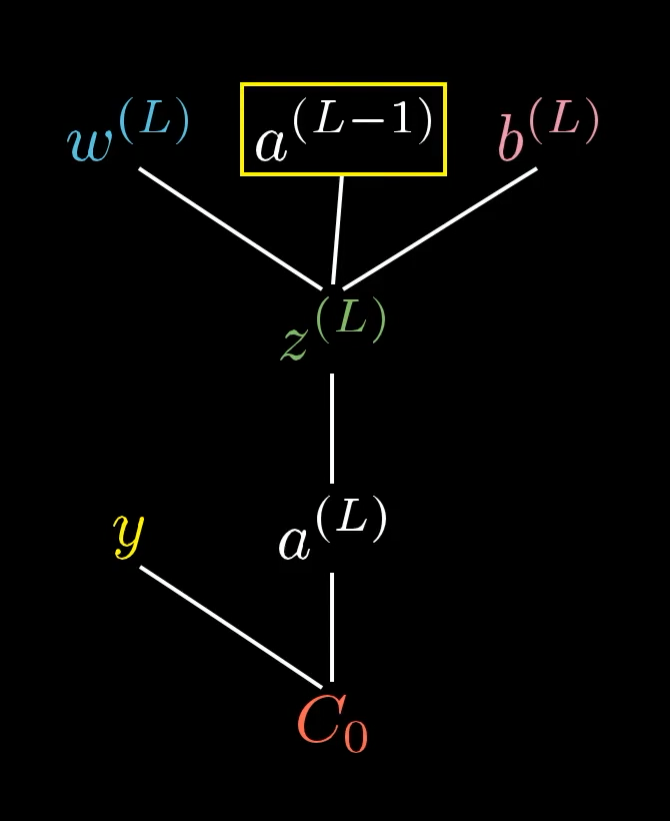

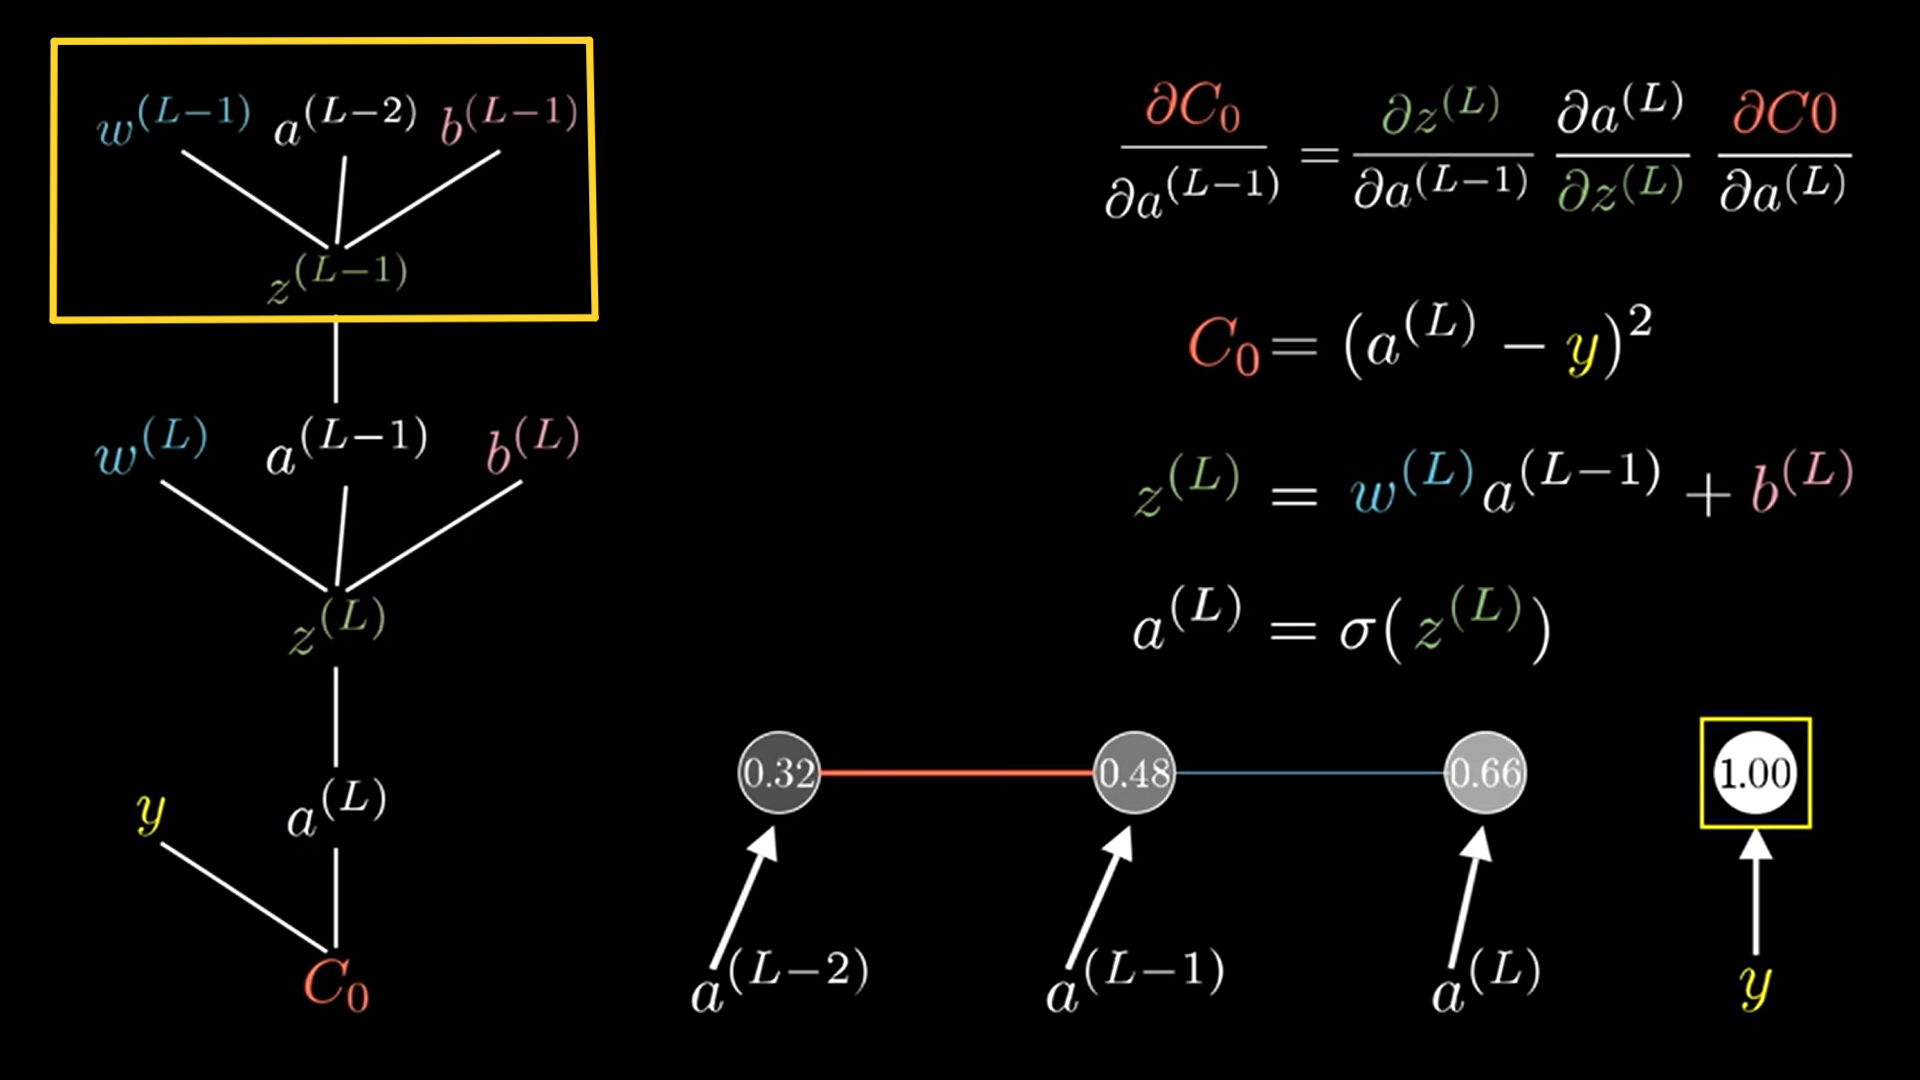

### 更複雜的網絡
嘗試在每層間多加些神經元。  
每個神經元上的上標表示它位於哪一層，下標表示它是哪個神經元。  
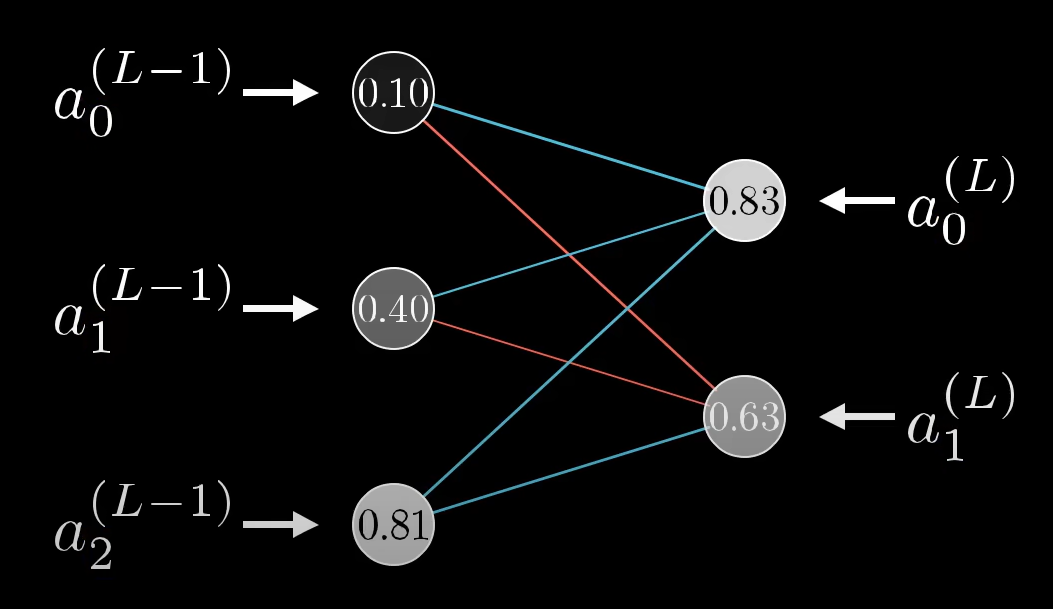

以$k$來標註$(L-1)$層的神經元，$j$則是$L$層的神經元，要求出代價函數$C_0$，先計算上層激活值和期望輸出的差值的平方，並求和：
$C_0 = \sum_{j=0}^{n_L-1}(a_j^{(L)}-y_j)^2$
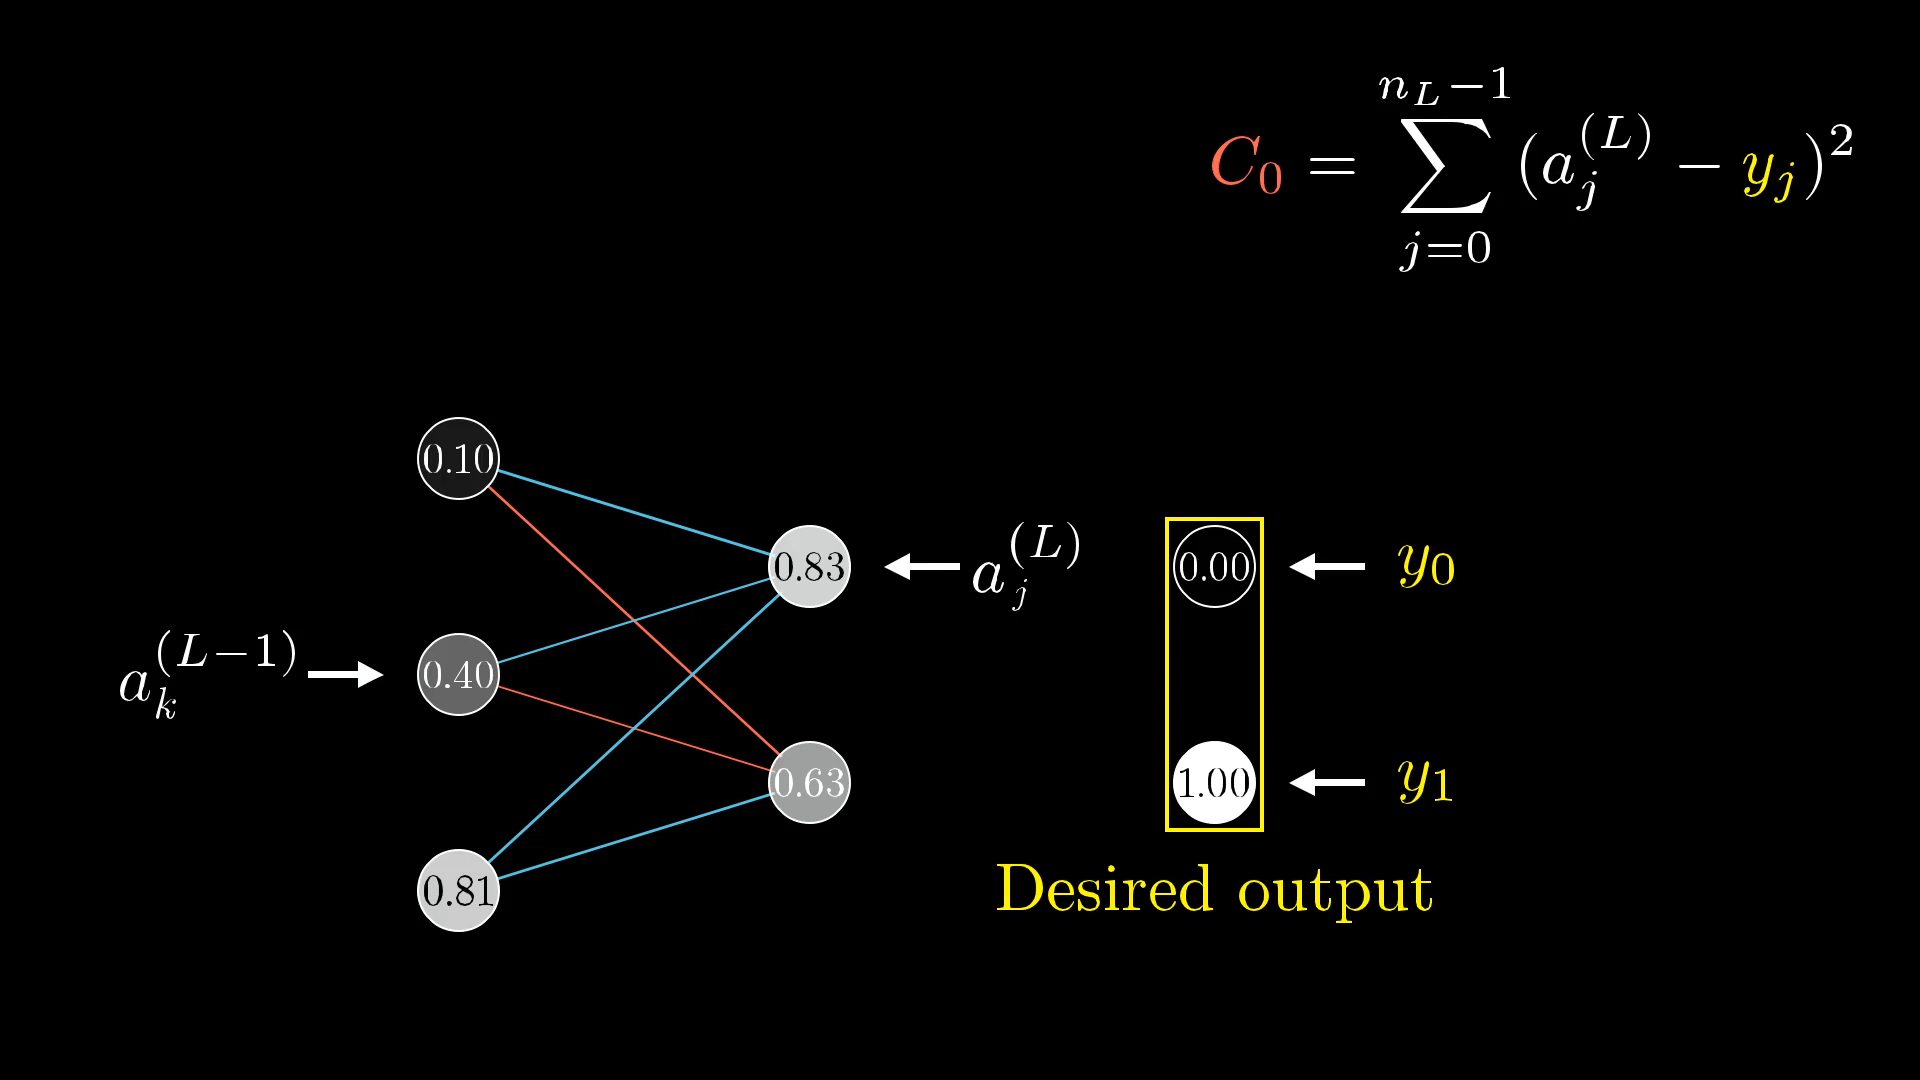


每個權重都需要多個標示去追蹤他的位置，將由第$k$th的神經元連接向第$j$th的神經元的權重稱為：$w^{(L)}_{jk}$  
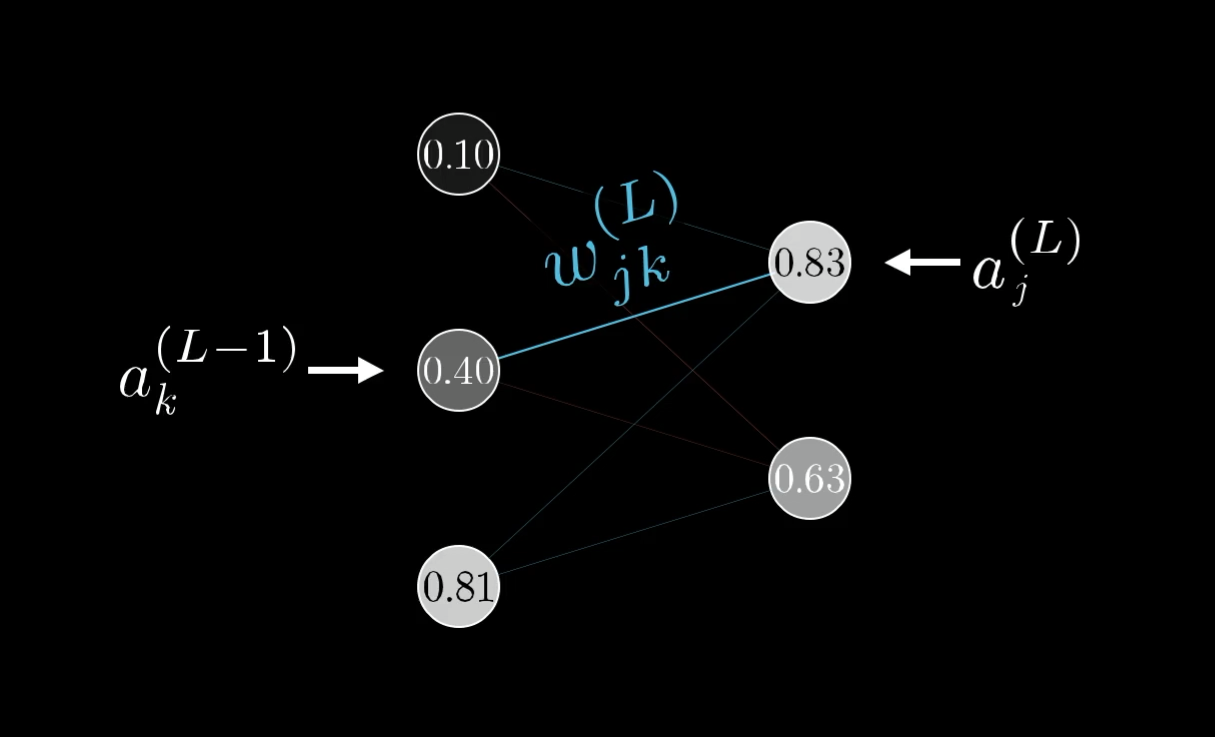

將加權和標記為$z$。  
$z_j^{(L)} = w_{j0}^{(L)}a_0^{(L-1)}+w_{j1}^{(L)}a_1^{(L-1)}+w_{j2}^{(L)}a_2^{(L-1)}+b_j^{(L)}$  

最後一層的激活值($a_j^{(L)}$)依然等於指定函數在$z$處的函數值，就跟之前每層只有單一神經元的網路一樣。  
$a_j^{(L)} = σ(z_j^{(L)})$


#### $z_j^{(L)}=... + w_{jk}^{(L)}a_k^{(L-1)}+...$  
  
#### $a_j^{(L)}=σ(z_j^{(L)})$  
  
#### $C_0 = \sum_{j=0}^{n_L-1}(a_j^{(L)}-y_j)^2$  

描述成本對特定權重影響的鍊式法則的導數表達式本質上也與我們先前的表達式相同。  
### $\frac{∂C_0}{∂w_{jk}^{(L)}} = \frac{∂z_j^{(L)}}{∂w_{jk}^{(L)}}\frac{∂a_j^{(L)}}{∂z_j^{(L)}}\frac{∂C_0}{∂a_j^{(L)}}$  

唯一不同的是$C_0$對$(L-1)$層激活值的導數：  
#### $\frac{\textcolor{red}{∂C_0}}{∂a_{k}^{(L-1)}} = \underbrace{\sum_{j=0}^{n_L-1}\frac{∂z_j^{(L)}}{∂a_{k}^{(L-1)}}\frac{∂a_j^{(L)}}{∂z_j^{(L)}}\frac{\textcolor{red}{∂C_0}}{∂a_j^{(L)}}}_{Sum\ over\ layer\ L }$  

此時，激活值($a_k^{(L-1)}$)可以通過不同的路徑影響代價函數。  
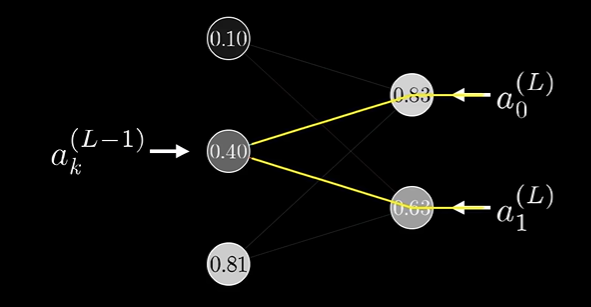  
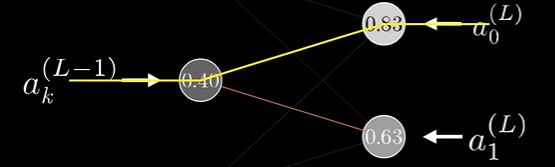  
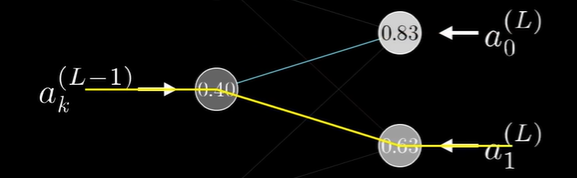

只要計算出倒數第二層代價函數對激活值的影響，接著重複上述步驟，計算倒數第二層的權重和偏差。  
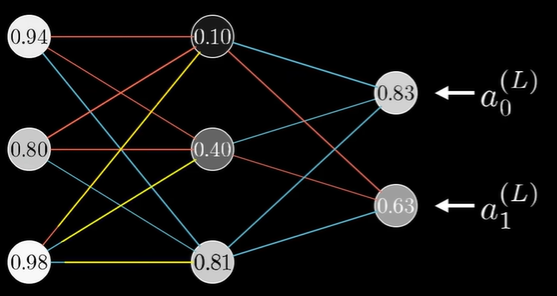  
鍊式法則表達式給出了決定梯度向量的偏導數，使神經網路不斷下探，以最小化神經網路的代價。  

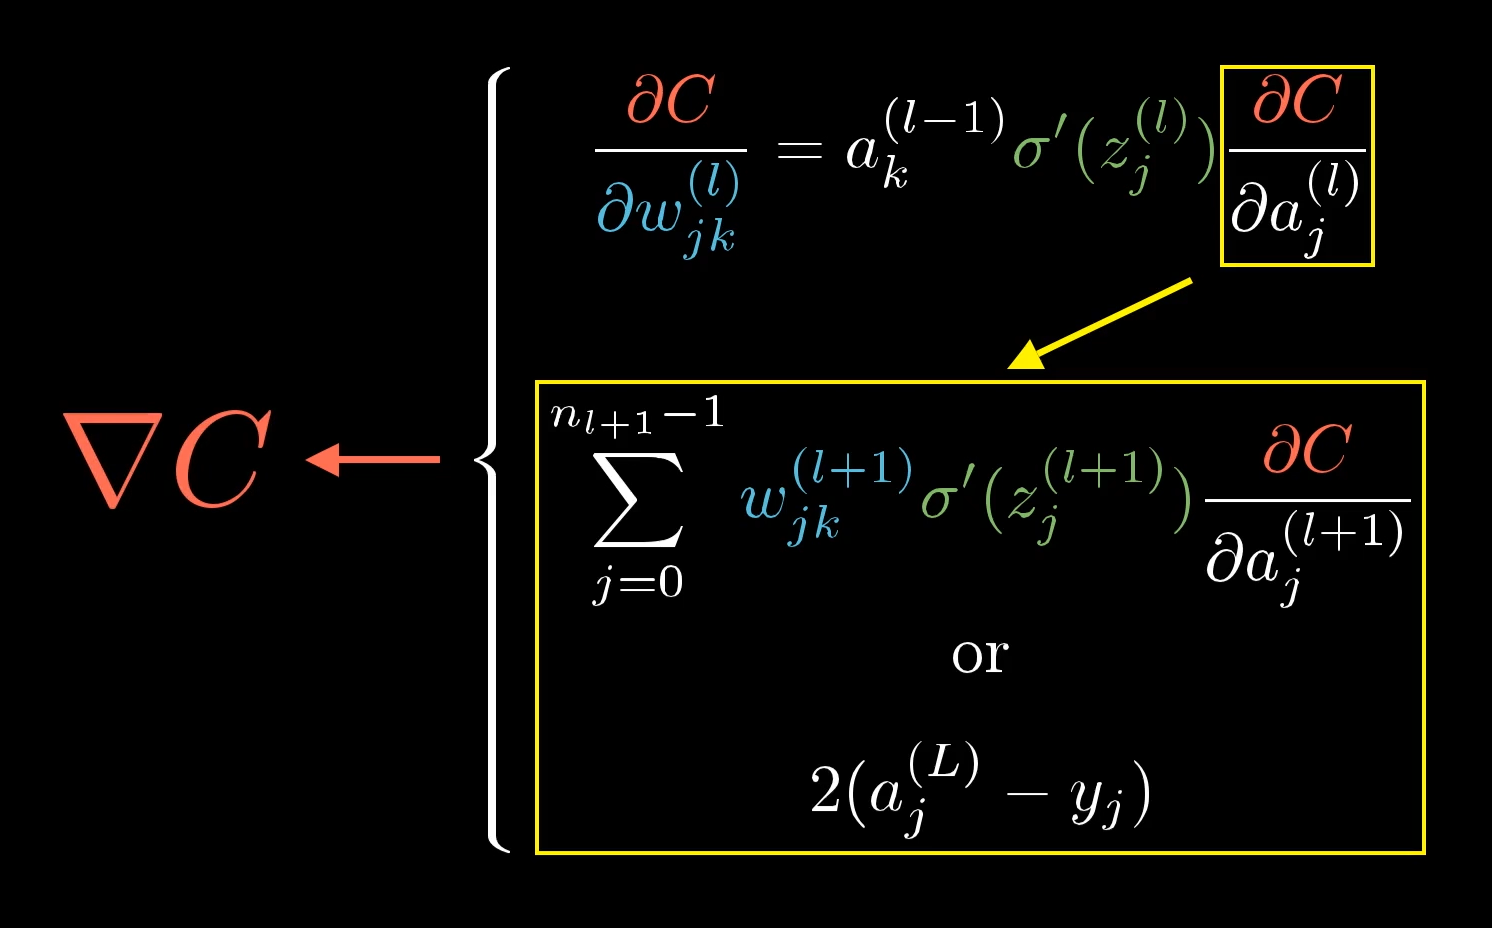

## Chapter 5

GPT是Generative Pre-trained Transformer的縮寫。  
* **Generative**:用來生成新文本的機器人。  
* **Pre-trained**:指模型經歷從大量數據中學習的過程，這個詞彙也暗示了模型還有進一步在特定任務中進行額外訓練和微調的可能。  
* **Transformer**:是一種特定類型的神經網路，一個機器學習模型。
  * 可以使用Transformer建構許多不同類型的模型。  
    ex:
    * 接受音頻輸入並生成文字，或者文本輸入以生成人工語音(text-to-voice)。
    * 將文本轉化為圖像(text-to-image)。
    * machine translation，進行語言間的翻譯。
* ChatGPT運用Transformer的範疇則是接受一段文本，再預測文章接下來的內容，而這種預測呈現概率分布形式，其中涵蓋了很多接下來可能會出現的文字片段。

給予一個初始片段，隨機從剛剛生成的概率分布中選取一個樣本，並將選中的樣本加入文字之中，接著再依據包含剛剛新生成文字串的內容進行新一輪的預測與選擇。模型會逐字地生成文本。  
在GPT-2中依照此方法創造出的故事缺乏了邏輯性，但當改使用GPT-3，一個相同的訓練模型，只是包含了更多的參數，卻可以成功得到一個合乎邏輯的故事。  


### 數據如何在Transformer模型中流轉的
* **Embedding**  
首先，輸入會被拆分成與多小片段，稱為Tokens，通常是單詞、單詞的一小部分...等，如果是圖像或音訊，則Token可能是圖像的一小塊區域，或聲音的一段小片段。  
$\underline{\overline{|To|　date|,|　the|　cle|ve|rest|　thinker|　of|　all|　time|　was|　???　|}}$



接著每隔Token都會對應到一個vector上，vector中數字的目的是為了以某種方式來表達該片段的含意。  
$\underbrace{\underline{\overline{|To|}}}_{\left[
\begin{array}{c}
    5.4 \\
    7.1 \\
    6.0 \\
    5.4 \\
    4.2 \\
    6.4 \\
    4.3 \\
    8.8 \\
     ⋮  \\
    3.8
\end{array}
\right]}$　
$\underbrace{\underline{\overline{|　date|}}}_{\left[
\begin{array}{c}
    7.8 \\
    5.2 \\
    5.6 \\
    9.2 \\
    0.7 \\
    0.9 \\
    0.2 \\
    8.2 \\
     ⋮  \\
    8.6
\end{array}
\right]}$　
$\underbrace{\underline{\overline{|,|}}}_{\left[
\begin{array}{c}
    9.7 \\
    7.9 \\
    4.6 \\
    7.7 \\
    1.2 \\
    6.3 \\
    1.4 \\
    9.4 \\
     ⋮  \\
    4.1
\end{array}
\right]}$　
$\underbrace{\underline{\overline{|　the|}}}_{\left[
\begin{array}{c}
    2.6 \\
    7.7 \\
    4.5 \\
    5.6 \\
    0.2 \\
    6.1 \\
    6.1 \\
    6.1 \\
     ⋮  \\
    6.8
\end{array}
\right]}$　
$\underbrace{\underline{\overline{|　cle|}}}_{\left[
\begin{array}{c}
    7.8 \\
    5.2 \\
    5.6 \\
    9.2 \\
    0.7 \\
    0.9 \\
    0.2 \\
    8.2 \\
     ⋮  \\
    8.6
\end{array}
\right]}$　
$\underbrace{\underline{\overline{|ve|}}}_{\left[
\begin{array}{c}
    7.8 \\
    5.2 \\
    5.6 \\
    9.2 \\
    0.7 \\
    0.9 \\
    0.2 \\
    8.2 \\
     ⋮  \\
    8.6
\end{array}
\right]}$　
$\underbrace{\underline{\overline{|rest|}}}_{\left[
\begin{array}{c}
    7.8 \\
    5.2 \\
    5.6 \\
    9.2 \\
    0.7 \\
    0.9 \\
    0.2 \\
    8.2 \\
     ⋮  \\
    8.6
\end{array}
\right]}$　
$\underbrace{\underline{\overline{|　thinker|}}}_{\left[
\begin{array}{c}
    7.8 \\
    5.2 \\
    5.6 \\
    9.2 \\
    0.7 \\
    0.9 \\
    0.2 \\
    8.2 \\
     ⋮  \\
    8.6
\end{array}
\right]}$　
$\underbrace{\underline{\overline{|　of|}}}_{\left[
\begin{array}{c}
    7.8 \\
    5.2 \\
    5.6 \\
    9.2 \\
    0.7 \\
    0.9 \\
    0.2 \\
    8.2 \\
     ⋮  \\
    8.6
\end{array}
\right]}$　
$\underbrace{\underline{\overline{|　all|}}}_{\left[
\begin{array}{c}
    7.8 \\
    5.2 \\
    5.6 \\
    9.2 \\
    0.7 \\
    0.9 \\
    0.2 \\
    8.2 \\
     ⋮  \\
    8.6
\end{array}
\right]}$　
$\underbrace{\underline{\overline{|　time|}}}_{\left[
\begin{array}{c}
    7.8 \\
    5.2 \\
    5.6 \\
    9.2 \\
    0.7 \\
    0.9 \\
    0.2 \\
    8.2 \\
     ⋮  \\
    8.6
\end{array}
\right]}$　
$\underbrace{\underline{\overline{|　was|}}}_{\left[
\begin{array}{c}
    7.8 \\
    5.2 \\
    5.6 \\
    9.2 \\
    0.7 \\
    0.9 \\
    0.2 \\
    8.2 \\
     ⋮  \\
    8.6
\end{array}
\right]}$　
$\underbrace{\underline{\overline{|　???　|}}}_{???}$  
若將這些向量想像成一個高維空間的座標，則含意相近的詞彙傾向於在相近的向量上。

* **Attention**  
這些向量序列接著會經過一個成為Attention block的處理過程，使的向量間可以互相交流，並根據彼此的訊息更新自身的值。
例如，model在ML中的意思與在時尚界中的意思是不同的，而Attention block就是要確定上下文中哪些詞對更新其他詞的意義有關，以及該如何準確的更新詞的含意。  
含意完全依照向量中的數字來表達，接著向量會經過另種處理，其根據資料的不同他可能被稱為，多層感知機(multilayer perceptron)或前饋層(feedforward layer)。

* **MIPs, (multilayer perceptron)**  
在這階段，向量不再互相交流，而是並行的一同處理。
可以將這個步驟想像成對每個向量提出一系列的問題，再根據這些問題的答案去更新向量。
Attention與multilayer perceptron這兩個處理階段本質上都是大量的矩陣乘法，而要如何解讀這些矩陣是我們要學習的目標。

接下來過程基本上是重複的，我們需要在Attention block與multi-layered perceptual blocks之間不斷切換，直到最後我們期望文章的意義能傳遞到最後一個向量中，再對這個向量進行特定操作，以產生一個覆蓋所有可能Token的概率分布，這些Token代表的可能是接下來出現的任何小段文本。  
一旦擁有了這個工具，他可以根據一小段文本預測下一步。

這章節將探討網路開始與結束發生的事情  
* 背景知識:
  * Premise of deep learning
  * Word embeddings
  * Dot products
  * Softmax
* 此章節關注在Transformer的核心部分，即Attention block
* 此外還會探討multi-layered perceptual blocks的訓練過程  

機器學習是一種方法論，涉及到使用數據來指導模型的行為模式，他會有一個輸入，而經過模型後我們希望他能產生期望的輸出；機器學習的核心思想在於我們不再嘗試去編寫固定的程式去完成任務，而是建構一個具有可調節參數的靈活結構，再通過大量實例輸入和期望輸出去調整參數的值，以此來模擬實際行為。  
最簡單的機器學入門模型就是線性回歸，輸入與輸出都是單一數字，例如房子面積與價格，通過預先給定的值使機器預先學習，找出與每個節點的資料都最為相近的線，以此做為未來預測房價的依據。  
當然實際中的人工智慧模型的參數可能不僅僅是兩個，例如，GPT-3就擁有1750億個參數，但並非簡單建構一個參數眾多的模型就能有效工作，因為這樣可能導致模型嚴重過擬合訓練數據，或者訓練的極為困難。  
深度學習涵蓋了許多具有出色擴展能力的模型類別，那些模型類別的關鍵在於都使用了相同的訓練算法:$Backpropagation$，而要讓反向傳播這種訓練算法能在大規模應用中順利進行，模型必須依循特定的結構(Pile of matrices)。

首先，不論建構的是哪種模型，輸入都必須是實數數組(a array of real numbers)，其可能是一個數字列表，也可能是一個二維數組，或更高維度的數組，其通用術語稱為:張量(Tensor)。  
這些輸入數據通常會被逐步轉換成多個不同的層，且每一層都構成了實數數組，直到最後一層(視為輸出層)，文本處理模型的最終輸出層是一個數字列表，這些數字代表了所有可能的詞彙的概率分布。  
在深度學習中，模型的參數通常被稱為權重，且這些參數與正在處理的數據間唯一的交互方式就是透過權重和(weight of sums)，ex.$w_1x_1+w_2x_2+...+w_nx_n$，模型中可能也會穿插一些非線性函數，ex.$f(w_1x_1+w_2x_2+...+w_nx_n)$，但他們並不依賴這些參數。  
且通常我們不會直接看到這些權重和的單獨出現，而是會發現他們被稱作為矩陣向量乘積的不同部分封裝起來，這其實是在傳達一個概念：輸出中的每一部分都像是一個權重和。  
ex.  
${\left[
\begin{array}{ccc}
    w_{1,1} & w_{1,2} & w_{1,2} & ... & w_{1,n} \\
    w_{2,1} & w_{2,2} & w_{2,2} & ... & w_{2,n} \\
    w_{3,1} & w_{3,2} & w_{3,2} & ... & w_{3,n} \\
    ⋮ & ⋮ &⋮ & ... & ⋮ \\
    w_{m,1} & w_{m,2} & w_{m,3} & ... & w_{m,n}
\end{array}
\right]}
{\left[
\begin{array}{ccc}
    x_1 \\
    x_2 \\
    x_3 \\
    ⋮ \\
    x_n
\end{array}
\right]}
=$
${\left[
\begin{array}{ccc}
    w_{1,1}x_1 + w_{1,2}x_2 + w_{1,2}x_3 + 　... 　+ w_{1,n}x_n \\
    w_{2,1}x_1 + w_{2,2}x_2 + w_{2,2}x_3 + 　... 　+ w_{2,n}x_n \\
    w_{3,1}x_1 + w_{3,2}x_2 + w_{3,2}x_3 + 　...　 + w_{3,n}x_n \\
    　⋮　　　　⋮　　　　　⋮　　　　⋮　　　　⋮　 \\
    w_{m,1}x_1 + w_{m,2}x_2 + w_{m,3}x_3 + ... + w_{m,n}x_n
\end{array}
\right]}
$  


以GPT-3為例，其中包含的175,181,291,520個權重被組織在大約28,000個不同的矩陣中，這些矩陣又被分為八個不同的類別。
* **Embedding**
* **Key**
* **Query**
* **Value**
* **Output**
* **Up-projection**
* **Down-projection**
* **Unembedding**  
參考GPT-3的具體數據去統計這1750億個權重是如何分配的，其中幾乎所以的計算過程都體現為矩陣和向量的乘積，但主要分為：  
1. **模型的權重(Weight)**
2. **正在處理的數據(Data)**  
權重就像模型的大腦，他們在訓練過程中學習，並決定模型的行為模式，而正在處理的數據僅僅只是編碼了某次操作中模型接收的具體輸入。


探討文本處理事例的第一步，將輸入分隔成小片段(Token)，並將這些片段轉換成向量。  
模型擁有一個預設的詞彙庫，其包含所有可能的單詞，但實際上他指的是Tokens。  
將第一個遇到的矩陣稱為$Embedding　matrix$他為每個單詞都分配了一個獨立的列，這些列定義了每個單詞轉換成的向量，將其命名為$W_E$，他的初始值是隨機的，但會基於給予的數據進行學習和調整。  
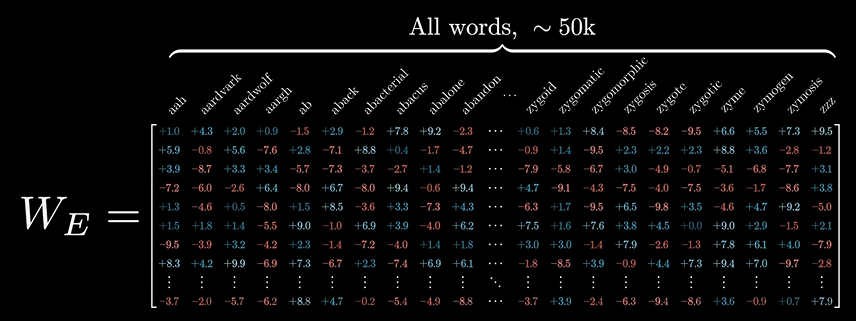  
在Transformers出現之前，機器學習中就已普遍採用將單詞轉換為向量的作法。  
機器學習中將這種轉換稱為詞嵌入(a word embedding)，這種表述使我們可以從幾和的角度去理解這些向量，將他們想像成高維空間中的點，且詞向量的維度遠超出一般常見的三維向量，在GPT-3中，他的維度就高達12,288。  
詞彙數量(Tokens)為50,257，embedding weight為12,288，將這兩者相乘，$Total parameters = 12288*50257$，得到大約$6.17$億個權重

透過在訓練中的參數微調，得已使詞在那個維度的空間中獲得具有特殊意義的方向。  
舉例而言，若在一個訓練好的模型中尋找所有與"塔樓"最相似的詞向量，可能會發現找到的詞都與塔樓有相似之處，可能都具有"高"、"建築"，等等特點。

In [1]:
!pip install gensim

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 667.3 kB/s eta 0:00:0000:0100:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.2/61.2 kB 681.7 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 652.7 kB/s eta 0:00:00a 0:00:01


In [2]:
import gensim.downloader as gd
model = gd.load("glove-wiki-gigaword-50")
model["tower"]

[==================================================] 100.0% 66.0/66.0MB downloaded


array([ 1.1474e+00,  1.1811e+00,  7.4556e-01, -5.9101e-02,  5.0499e-01,
       -7.0449e-01, -3.2136e-01, -4.5390e-01, -4.5763e-01, -7.5341e-01,
       -3.3511e-01, -2.4975e-02, -5.0192e-01,  6.3773e-01, -8.3059e-01,
        8.3565e-01, -2.4701e-01,  3.2421e-01, -1.1103e+00, -2.1335e-02,
        6.8717e-01, -3.9340e-01, -1.6390e+00, -5.0493e-01, -1.6684e-01,
       -6.7649e-01, -3.1798e-01,  8.8503e-01, -3.1552e-02, -1.5608e-01,
        1.9805e+00, -1.1870e+00,  8.3342e-01, -1.8369e-01, -2.6691e-01,
        1.1619e-01,  1.1023e+00, -3.5937e-01,  2.5015e-02, -4.0615e-02,
        3.0681e-01, -4.1076e-01,  8.4586e-02,  2.2475e-01, -5.0955e-01,
        6.5819e-01, -1.2432e-01, -1.4039e+00,  1.6178e-04, -5.2529e-01],
      dtype=float32)

在理論上，woman與man和queen與king之間的差值非常相似  
$E(queen)-E(king) \approx E(woman)-E(man)$  
因此若希望獲得queen的座標，可以透過：$E(queen) \approx E(king)+E(woman)-E(man)$並搜索最接近計算結果的詞向量來找出queen的準確座標，但實際上真正的queen其實比以這種預想的位置還更遠一些，這可能因為在訓練數據中，queen可能並不完全是king的女性版本，而以家族關係來解釋這種向量差值會更加準確。

$E(woman)-E(man) \approx E(niece)-E(nephew)$  
$E(woman)-E(man) \approx E(mother)-E(father)$  
關鍵在於，訓練過程中模型發現這樣的嵌入方式更有利於查找資料  
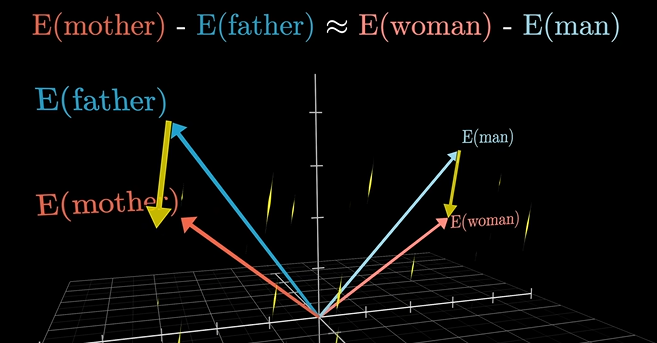  


In [3]:
print("woman-man",model["woman"]-model["man"])
print("mother-father",model["mother"]-model["father"])


woman-man [-0.087144    0.2182     -0.40985996 -0.03922001 -0.10320008  0.94165003
 -0.06042001  0.32988     0.46144    -0.35962     0.31102    -0.86824
  0.96006     0.01073003  0.24337     0.08193001 -1.02722    -0.21122
  0.695044   -0.00222     0.29106003  0.50530005 -0.099454    0.40445
  0.30181003  0.1355002  -0.06060004 -0.07131001 -0.19245    -0.06115001
 -0.3204      0.07165    -0.13337001 -0.25068715 -0.14292999 -0.224957
 -0.14899999  0.048882    0.12191002 -0.27362    -0.16547601 -0.20426002
  0.54376    -0.27142498 -0.10244995 -0.32108003  0.2516     -0.33454996
 -0.04371002  0.01258   ]
mother-father [ 0.338104    0.36852002 -0.21182999  0.00165004 -0.00410008  0.60599005
  0.13417    -0.00759     0.8724646  -0.0555536  -0.13587001 -0.52359
  0.73501     0.20769     0.15551001  0.13162601 -0.41107    -0.193367
  0.45395005 -0.06979001 -0.00160001  0.6422      0.357435    0.355503
  0.36681998  0.23119998 -0.00817001  0.59165     0.19191    -0.78538
  0.07300007  0.496748

兩個點的點積可以被視為一種衡量他們是否對齊的方式。  
$\left[
\begin{array}{c}
    v_1 \\
    v_2 \\
    v_3 \\
    ⋮ \\
    v_n
\end{array}
\right]．\left[
\begin{array}{c}
    w_1 \\
    w_2 \\
    w_3 \\
    ⋮ \\
    w_n
\end{array}
\right] = v_1w_1+v_2w_2+v_3w_3+...+v_nw_n$  

點積涉及到逐一乘以對應元素，再進行求和。  
從幾何角度而言，若兩個向量指向相似方向時，點積為正；垂直時，點積為0；指向相反方向時，點積為負。


$\vec{plur}:=E(cats)-E(cat)$  
可能在$E(cats)-E(cat)$這個空間中找到表示負數概念的方向

In [5]:
print("plur cat:",model["cats"]-model["cat"])
print("plur dog:",model["dogs"]-model["dog"])

plur cat: [-0.02199    -0.35108    -0.01924998 -0.634903   -0.32648998  0.11365002
 -0.24805999 -0.05373996 -0.24123001  0.15840201 -0.14634998 -0.36223003
  0.11755997 -0.70904005  0.01692998  0.05896997  0.81096    -0.42523998
 -0.30130005  0.266191   -0.08174002  0.0142      0.46699002  0.15809998
 -0.24404001  0.88282     0.28436    -0.68671     0.14561999 -0.32805002
 -0.16110003  0.76809     0.39828    -0.69056004  0.46418     0.21342
  0.20650001 -0.12044999 -0.17143999  0.32875    -0.207801   -0.67872
  0.72977996  0.29582     0.18046993  0.80364    -0.54152     0.48396003
 -0.01890999 -0.34506   ]
plur dog: [ 0.55285    -0.57915     0.43281    -0.47945002 -0.45615995 -0.31822002
  0.13395005  0.01973999 -0.27391005 -0.08849001  0.0383923  -0.46111298
  0.42479002 -0.30453002 -0.21127999  0.158865    0.17498001 -0.24308002
 -0.33429992 -0.17462003 -0.04848999  0.16438001  0.32549995 -0.22725004
 -0.24602     0.6838      0.31545    -0.367275    0.34017003 -0.40912998
  0.0451999

單詞的嵌入方式是透過數據學習而得到的，這種嵌入矩陣揭示了每個詞彙的變化過程，這些嵌入空間中的向量除了代表單個詞彙之外，他還攜帶了位置訊息，此外這些向量能夠反應語境，舉例而言，一個最初代表"king"的向量，在網路中各個環節的作用下，可能會逐漸變化，最後他只向的方向會更加具體，例如，以某種方式得出了一位生活在蘇格蘭的國王，在殺死前任國王後取得該職位  
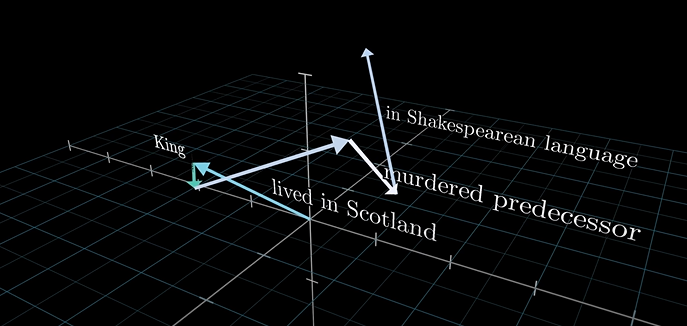

對詞彙的理解通常是基於環境而決定的，而有時甚至會受距離遙遠的上下文影響，因此在建構一個預測下個詞彙的模型時關鍵目標在於它能否高效的融合上下文訊息。  
在最初，依據輸入的文本創建向量數據時，每個向量都是直接從embedding matrix中選取的，這意味著每個向量在此時都僅能代表一個單詞的含意，而不包含周圍的訊息，而我們的目標是讓這些向量通過網路傳遞，使每一個向量都能獲得比單個詞更豐富、更具體的含意。  
這個網路每次都只能處理一定數量的向量，即上下文大小(Context size)，GPT-3的上下文大小為2048，意指數據在網路中流動時，看起來總是像一串2048列的串列，每一列都有12000個維度，上下文大小限制了Transformer在預測下一個詞的過程中可以納入的文本量，因此在與Chat GPT對話的過程中，隨著對話紀錄變長，他們會逐漸開始遺忘之前曾說過的話。


**神經網路在最終階段的處理過程**：  
最終目標是產生一個概率分布，預測下一個可能出現的Token，舉例而言，假設Token為完整的單詞，且以下句子中包含:Harry Potter、least favorite teacher  
$\underline{\overline{|Harry　Potter|}}　was　a　highly　unusual　boy　...\underline{\overline{|least　favorite|}}　teacher,　Professor　\underline{\overline{|　???　|}}$  
而一個已經訓練成功且對哈利波特故事有所理解的網路，很可能給Snape這個詞一個較高的權重。  
此過程涉及兩個不同的步驟，首先，使用另一個矩陣，將上下文中的最後一個向量映射到一個包含50000個值的列表，詞彙表中的每個token都對應一個值。  
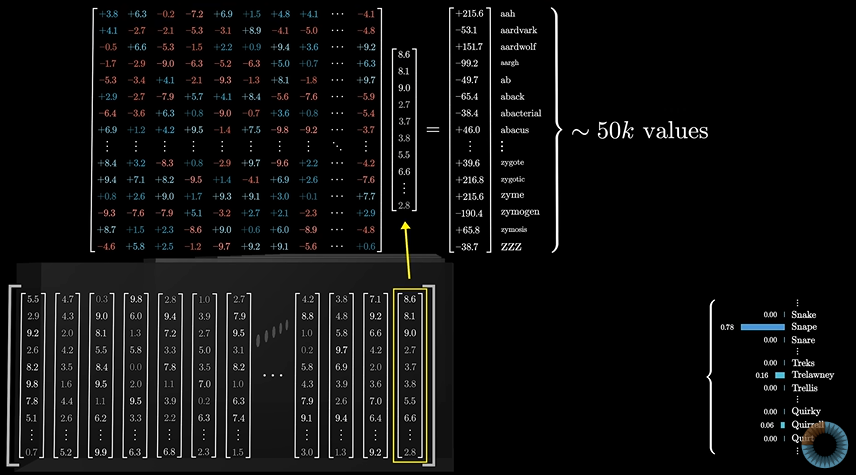  
接著通過函數$softmax$，將這些值都轉換成概率分布，雖然僅透過最後一個向量就進行預測感覺可能會有點奇怪，因為最後一層中還有成千上萬個其他向量都富含著上下文意義，但在訓練過程中，選用最終層的每一個向量來預測下個詞彙，被證明是更高效的方法。

* **Unembedding**:  
這個矩陣被稱為Unembedding matrix，以$W_U$命名，他就像之前的所有權重矩陣一樣，矩陣的初始值是隨機的，但在訓練過程中會被更新，參數總數的統計，這個矩陣為詞彙表中的每個單詞都分配了一行(橫)，每一行都包含與嵌入維度相同數量的元素，這與embedding matrix很相似，但將順序顛倒了，$Total parameters = 50257*12288$，也得到大約$6.17$億個權重，為網路另外增加了$6.17$億個參數  
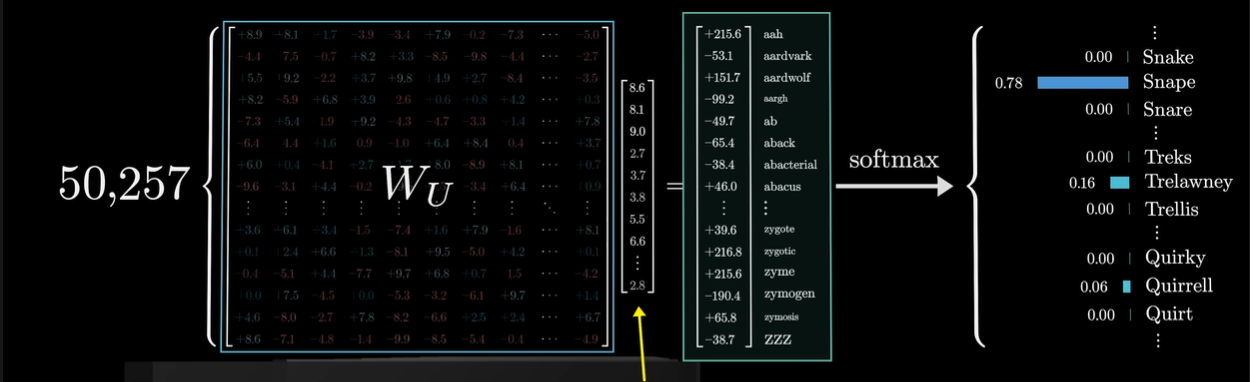

目前為止參數總數已經超過$10$億，但最終的目標是$1750$億  
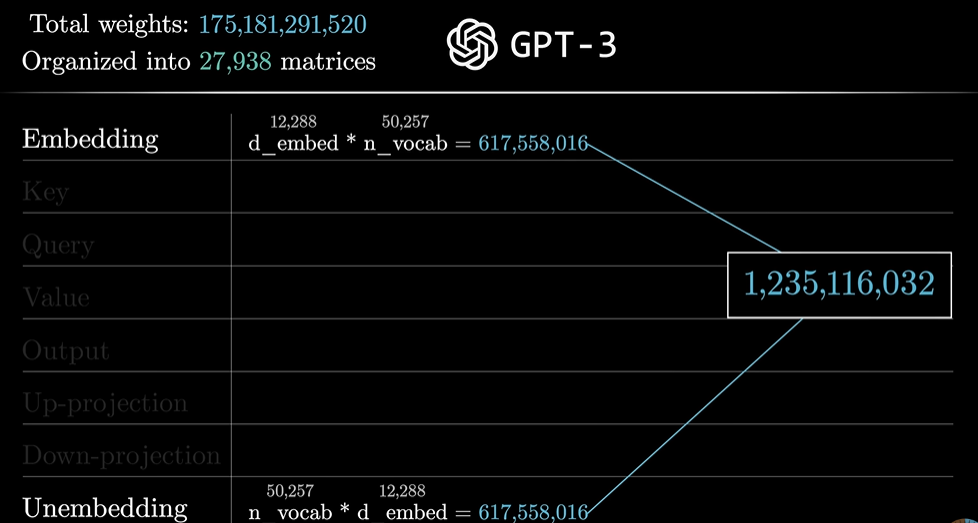

* $Softmax function$
若想讓一串數字成為概率分布，則須要讓他們都介於0到1之間，並加總的和為1，但在矩陣和向量的乘法間，得到的輸出並不一定會在0到1的區間中，此時會使用$Softmax function$使的越大的值會越接近1，越小的值越接近0。  
先對每個數值(Input)進行$e$的指數計算，求得正數後，再用每個數去除所有正數的和，如此就成功將他們標準化為總和為1的數據。  
$\left[
\begin{array}{c}
    x_1 \\
    x_2 \\
    x_3 \\
    x_4 \\
    x_5 \\
    x_6 \\
    x_7
\end{array}
\right]\rightarrow \left[
\begin{array}{c}
    e^{x_1}>0 \\
    e^{x_2}>0 \\
    e^{x_3}>0 \\
    e^{x_4}>0 \\
    e^{x_5}>0 \\
    e^{x_6}>0 \\
    e^{x_7}>0
\end{array}
\right]\rightarrow \left[
\begin{array}{c}
    e^{x_1}/\sum_{n=0}^{N-1}e^{x_n} \\
    e^{x_2}/\sum_{n=0}^{N-1}e^{x_n} \\
    e^{x_3}/\sum_{n=0}^{N-1}e^{x_n} \\
    e^{x_4}/\sum_{n=0}^{N-1}e^{x_n} \\
    e^{x_5}/\sum_{n=0}^{N-1}e^{x_n} \\
    e^{x_6}/\sum_{n=0}^{N-1}e^{x_n} \\
    e^{x_7}/\sum_{n=0}^{N-1}e^{x_n}
\end{array}
\right]$
通常將這些未標準化的輸出稱為$Logits$他會作為$Softmax function$的輸入，$Softmax function$的輸出稱為$Probabilities$。  
在指數的分母中增加一個常量$T$(Temperature)，使得當$T$越大時，會使較小的值獲得更多的權重，使得分布更加平均，而$T$越小時，較大的數值會更有影響力，例如將$T$設為$0$，則所有的權重都會集中在最大的值上，其選擇的詞彙也會使的整個文本看起來過於陳腔濫調，而$T$越高則使更多詞彙被選擇的機率提高，有可能帶來創新，也可能使文本過於荒誕。  
$\left[
\begin{array}{c}
    e^{x_1/T}/\sum_{n=0}^{N-1}e^{x_n/T} \\
    e^{x_2/T}/\sum_{n=0}^{N-1}e^{x_n/T} \\
    e^{x_3/T}/\sum_{n=0}^{N-1}e^{x_n/T} \\
    e^{x_4/T}/\sum_{n=0}^{N-1}e^{x_n/T} \\
    e^{x_5/T}/\sum_{n=0}^{N-1}e^{x_n/T} \\
    e^{x_6/T}/\sum_{n=0}^{N-1}e^{x_n/T} \\
    e^{x_7/T}/\sum_{n=0}^{N-1}e^{x_n/T}
\end{array}
\right]$  
API實際上不允許你選擇大於2的值，但並沒有依據，僅為人為限制。

## Chapter 6